<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EcuacionesNoLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos numéricos

Desarrollo de métodos para resolver ecuaciones no lineales

In [1]:
#import de bibliotecas necesarias
import numpy as np #importa la bilbioteca para crear arreglos
import pandas as pd #importa la biblioteca para crear las tablas de iteraciones

##Bisección

Definición de la función del método de **Bisección**

In [2]:
#Esciba el código del método de Bisección
def biseccion(f,x0,x1,tol=1e-5):
  '''
  El método de Bisección es un método cerrado para resolver ecuaciones no lineales
  los argumentos son:

  entrada
  -------
       f : ecuación a resolver expresada en la forma f(x)=0
  x0, x1 : puntos que encierran la raiz f(x0)*f(x1)<0
     tol : tolerancia (valor por defecto 1e-5)

  salida
  ------
      x : raíz de la ecuación
   tabla: tabla de iteraciones
  '''
  #se valida que la funcion cambia de signo
  if f(x0)*f(x1)>0:
    raise Exception('Rango invalido, no cruza el eje x!!')
  x=x0 #valor inical de x
  #se construye los encabezados de la tabla de iteraciones
  tabla=pd.DataFrame(columns=['x0','x','x1','f(x0)','f(x)','f(x1)'])
  #se hacen las iteraciones en busqueda de la raiz
  while np.abs(f(x))>tol:
    x=(x0+x1)/2 #se calcula la mitad del intervalo metodo de la biseccion
    #se inserta un nuevo renglon a la tabla de iteraciones
    tabla=tabla.append({'x0':x0,'x':x,'x1':x1,
                        'f(x0)':f(x0),'f(x)':f(x),'f(x1)':f(x1)},
                       ignore_index=True)
    #se valida donde se encuentra la raiz
    if f(x0)*f(x)<0:
      #esta en el primer subintervalo [x0,x]
      x1=x
    else:
      #esta en el segundo subintervalo [x,x1]
      x0=x
  #se retorna el resultado de la raiz y la tabla de iteraciones
  return x,tabla

In [4]:
#Ayuda de la función
help (biseccion)

Help on function biseccion in module __main__:

biseccion(f, x0, x1, tol=1e-05)
    El método de Bisección es un método cerrado para resolver ecuaciones no lineales
    los argumentos son:
    
    entrada
    -------
         f : ecuación a resolver expresada en la forma f(x)=0
    x0, x1 : puntos que encierran la raiz f(x0)*f(x1)<0
       tol : tolerancia (valor por defecto 1e-5)
    
    salida
    ------
        x : raíz de la ecuación
     tabla: tabla de iteraciones



**Problema**: Encontrar la raíz cuadrada de 2 usando el método de **Bisección**

$$
\sqrt{2}=x\\
2=x^2\\
f(x)=x^2-2=0
$$

In [5]:
#definir la función a resolver
def f(x):
  return x**2-2


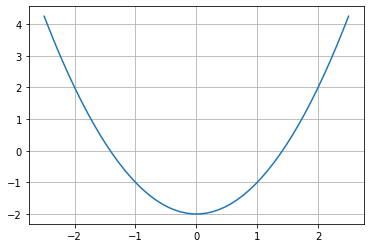

In [7]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
import matplotlib.pyplot as plt #biblioteca pra graficar
x=np.linspace(-2.5,2.5) #se crea el vector x
y=f(x) #se crea el vector y con la evaluacion de la funcion
plt.plot(x,y) #construye la grafica
plt.grid() #dibuja la rejilla
plt.show() #muestra la grafica


In [11]:
#Hacer la llamada a la función
raiz,iteraciones=biseccion(f,-2,-1,0.001)
print(raiz)
print(iteraciones)

-1.4140625
         x0         x       x1     f(x0)      f(x)     f(x1)
0 -2.000000 -1.500000 -1.00000  2.000000  0.250000 -1.000000
1 -1.500000 -1.250000 -1.00000  0.250000 -0.437500 -1.000000
2 -1.500000 -1.375000 -1.25000  0.250000 -0.109375 -0.437500
3 -1.500000 -1.437500 -1.37500  0.250000  0.066406 -0.109375
4 -1.437500 -1.406250 -1.37500  0.066406 -0.022461 -0.109375
5 -1.437500 -1.421875 -1.40625  0.066406  0.021729 -0.022461
6 -1.421875 -1.414062 -1.40625  0.021729 -0.000427 -0.022461


**Problema**: Encontrar la raíz cúbica de 5 usando el método de **Bisección**

$$
\sqrt[3]{5}=x\\
5=x^3\\
f(x)=x^3-5=0
$$

In [12]:
#definir la función a resolver
def f(x):
  return x**3-5

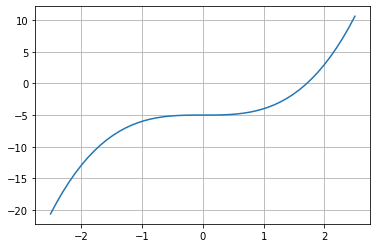

In [13]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
import matplotlib.pyplot as plt #biblioteca pra graficar
x=np.linspace(-2.5,2.5) #se crea el vector x
y=f(x) #se crea el vector y con la evaluacion de la funcion
plt.plot(x,y) #construye la grafica
plt.grid() #dibuja la rejilla
plt.show() #muestra la grafica

In [14]:
#Hacer la llamada a la función
raiz,iteraciones=biseccion(f,1,2,0.0001)
print(raiz)
print(iteraciones)

1.7099761962890625
          x0         x        x1     f(x0)      f(x)     f(x1)
0   1.000000  1.500000  2.000000 -4.000000 -1.625000  3.000000
1   1.500000  1.750000  2.000000 -1.625000  0.359375  3.000000
2   1.500000  1.625000  1.750000 -1.625000 -0.708984  0.359375
3   1.625000  1.687500  1.750000 -0.708984 -0.194580  0.359375
4   1.687500  1.718750  1.750000 -0.194580  0.077362  0.359375
5   1.687500  1.703125  1.718750 -0.194580 -0.059856  0.077362
6   1.703125  1.710938  1.718750 -0.059856  0.008440  0.077362
7   1.703125  1.707031  1.710938 -0.059856 -0.025787  0.008440
8   1.707031  1.708984  1.710938 -0.025787 -0.008693  0.008440
9   1.708984  1.709961  1.710938 -0.008693 -0.000132  0.008440
10  1.709961  1.710449  1.710938 -0.000132  0.004153  0.008440
11  1.709961  1.710205  1.710449 -0.000132  0.002010  0.004153
12  1.709961  1.710083  1.710205 -0.000132  0.000939  0.002010
13  1.709961  1.710022  1.710083 -0.000132  0.000404  0.000939
14  1.709961  1.709991  1.710022 -0.

##Regla Falsa

In [15]:
#Definición de la función para el método de la Regla Falsa
def reglaFalsa(f,x0,x1,tol=1e-5):
  '''
  El método de la regla falsa es un método cerrado para resolver ecuaciones no lineales
  los argumentos son:

  entrada
  -------
       f : ecuación a resolver expresada en la forma f(x)=0
  x0, x1 : puntos que encierran la raiz f(x0)*f(x1)<0
     tol : tolerancia (valor por defecto 1e-5)

  salida
  ------
      x : raíz de la ecuación
   tabla: tabla de iteraciones
  '''
  #se valida que la funcion cambia de signo
  if f(x0)*f(x1)>0:
    raise Exception('Rango invalido, no cruza el eje x!!')
  x=x0 #valor inical de x
  #se construye los encabezados de la tabla de iteraciones
  tabla=pd.DataFrame(columns=['x0','x','x1','f(x0)','f(x)','f(x1)'])
  #se hacen las iteraciones en busqueda de la raiz
  while np.abs(f(x))>tol:
    x=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0)) #se calcula x para la regla falsa
    #se inserta un nuevo renglon a la tabla de iteraciones
    tabla=tabla.append({'x0':x0,'x':x,'x1':x1,
                        'f(x0)':f(x0),'f(x)':f(x),'f(x1)':f(x1)},
                       ignore_index=True)
    #se valida donde se encuentra la raiz
    if f(x0)*f(x)<0:
      #esta en el primer subintervalo [x0,x]
      x1=x
    else:
      #esta en el segundo subintervalo [x,x1]
      x0=x
  #se retorna el resultado de la raiz y la tabla de iteraciones
  return x,tabla


**Problema**: Calcular la altura del agua en un tanque esférico que contenga $1000 l$ si el radio del tanque es $R=10$

$$
V=\pi h^2\left( \frac{3R-h}{3}\right)\\
1000=\pi h^2\left( \frac{30-h}{3}\right)\\
f(h)=\pi h^2\left( \frac{30-h}{3}\right)-1000=0
$$

In [16]:
#definir la función a resolver
def f(h):
  return np.pi*h**2*(30-h)/3-1000


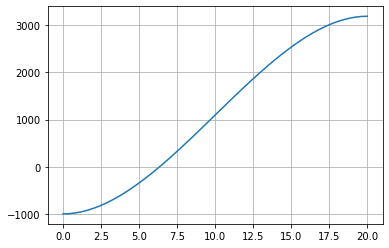

In [17]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
import matplotlib.pyplot as plt #biblioteca pra graficar
x=np.linspace(0,20) #se crea el vector x
y=f(x) #se crea el vector y con la evaluacion de la funcion
plt.plot(x,y) #construye la grafica
plt.grid() #dibuja la rejilla
plt.show() #muestra la grafica


In [18]:
#Hacer la llamada a la función
raiz,tabla=reglaFalsa(f,5,7.5)
print(raiz)
print(tabla)

6.355008054423839
         x0         x   x1       f(x0)       f(x)       f(x1)
0  5.000000  6.287530  7.5 -345.501531 -18.329822  325.359401
1  6.287530  6.352194  7.5  -18.329822  -0.766389  325.359401
2  6.352194  6.354892  7.5   -0.766389  -0.031675  325.359401
3  6.354892  6.355003  7.5   -0.031675  -0.001309  325.359401
4  6.355003  6.355008  7.5   -0.001309  -0.000054  325.359401
5  6.355008  6.355008  7.5   -0.000054  -0.000002  325.359401


##Newton-Raphson

In [ ]:
#Definición de la función para el método de Newton-Raphson



Fluye aire a una temperatura de 25 C y
1 atm a través de un tubo de 4 mm de diámetro a una velocidad promedio de 50 m/s. La
rugosidad es de $\epsilon= 0.0015mm$ y $Re=13743$. Calcular el factor de fricción usando la ecuación
de Colebrook.
$$
\frac{1}{\sqrt{f}}=
-2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)\\
F(f)=\frac{1}{\sqrt{f}}+2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)\\
F'(f)=\frac{-1}{2\sqrt{f^3}}-\frac{2.51}{Re\sqrt{f^3}\frac{2.51}{Re\sqrt{f}}+\frac{\epsilon /D}{3.7}}
$$

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función



##Secante

In [ ]:
#Definición de la función para el método de Secante



**Problema**: Fluye aire a una temperatura de 25 C y
1 atm a través de un tubo de 4 mm de diámetro a una velocidad promedio de 50 m/s. La
rugosidad es de $\epsilon= 0.0015mm$ y $Re=13743$. Calcular el factor de fricción usando la ecuación
de Colebrook.
$$
\frac{1}{\sqrt{f}}=
-2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)\\
F(f)=\frac{1}{\sqrt{f}}+2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)
$$

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función


##Muller

In [ ]:
#Definición de la función para el método de Muller



**Problema**: Calcular el volumen de $2 moles$ de $CO_2$ a una presión de $10 atm$ y $300K$, usando la ecuación de Van der Waals

$$
\left(P+\frac{an^2}{V^2}\right) (V-nb) = nRT
$$

Donde $a = 3.592$, $b = 0.04267$, $n = 2$, $R = 0.082$, $T = 300$ y $P = 10$.

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función


##Punto fijo

In [ ]:
#Definición de la función para el método de Punto Fijo


**Problema**: Calcular el volumen de $2 moles$ de $CO_2$ a una presión de $10 atm$ y $300K$, usando la ecuación de Van der Waals

$$
\left(P+\frac{an^2}{V^2}\right) (V-nb) = nRT
$$

Donde $a = 3.592$, $b = 0.04267$, $n = 2$, $R = 0.082$, $T = 300$ y $P = 10$.

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función
